In [142]:
# -*- coding: utf-8 -*
import twitter
import csv
import json
import re
import requests
import lxml.html as html
from urllib2 import urlopen
import pandas as pd
from datetime import datetime, timedelta
from dateutil import tz
import time
import sklearn.cross_validation as cv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [143]:
PREPARED_CSV = "prepared_to_analys.csv"
df = pd.read_csv(PREPARED_CSV, sep=",")

In [144]:
# Удаляем лишние столбцы
major_features = ["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet"]
df = df[major_features]

In [145]:
# С глубоким прискорбием удаляем NA - если ничего не было, пока не будем будмать, что могло быть
df = df.drop_duplicates().dropna()

In [146]:
# В итоге имеем:
len(df)

95

In [147]:
df.head(1)

,url,week_day_news,minutes_since_midnight,first_time_tweet,follower_sum,retweeted_count_sum,favorite_count_sum,user_listed_count_sum,last_time_tweet
38,https://vc.ru/n/fb-virus-2015,4,1005,3,61700,4,9,721,9


In [148]:
x = df[df.columns[1:-1]].as_matrix()
y = df[df.columns[-1]].as_matrix()

In [149]:
# Делим данные
x_train, x_test, y_train, y_test = cv.train_test_split(x, y, test_size=0.2)

In [150]:
print "Коэффициенты корреляции Y:"
for i in range(len(major_features)-2):
    print major_features[i+1], "=", np.corrcoef(x[:,i], y)[0][1]

Коэффициенты корреляции Y:
week_day_news = 0.0475201891865
minutes_since_midnight = 0.216316878546
first_time_tweet = 0.718292678912
follower_sum = 0.522501759077
retweeted_count_sum = 0.243549785621
favorite_count_sum = 0.308088873405
user_listed_count_sum = 0.341172075034


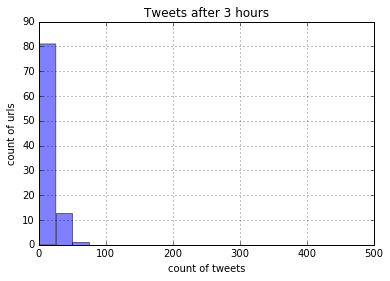

In [151]:
df.last_time_tweet.hist(alpha=0.5, bins=[i*25 for i in range(20)])
plt.title("Tweets after 3 hours")
plt.ylabel("count of urls")
plt.xlabel("count of tweets")
plt.show()

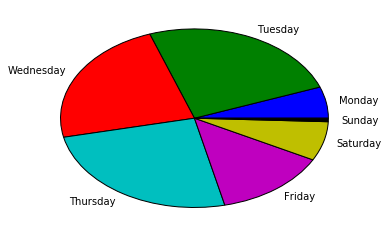

In [152]:
#df.week_day_news.hist(alpha=0.5, bins=[i for i in range(7)])
S = df.groupby("week_day_news")["last_time_tweet"].sum()
plt.pie(S.as_matrix(), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]);
plt.show();

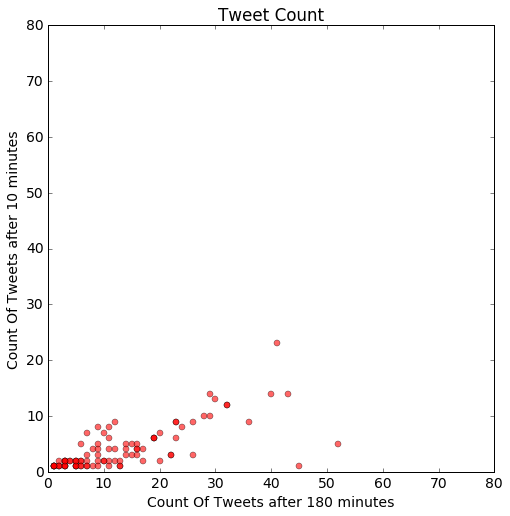

In [175]:
plt.figure(figsize=(8,8))
plt.plot(df["last_time_tweet"].as_matrix(), df["first_time_tweet"].as_matrix(), 'ro',  alpha=0.6)
plt.title("Tweet Count")
plt.xlabel("Count Of Tweets after 180 minutes")
plt.ylabel("Count Of Tweets after 10 minutes")
plt.xlim(0, 80)
plt.ylim(0, 80)
#plt.xscale('log')
#plt.yscale('log')
#plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.rcParams.update({'font.size': 14})

In [172]:
df[df["last_time_tweet"]< 40]

,url,week_day_news,minutes_since_midnight,first_time_tweet,follower_sum,retweeted_count_sum,favorite_count_sum,user_listed_count_sum,last_time_tweet
38,https://vc.ru/n/fb-virus-2015,4,1005,3,61700,4,9,721,9
114,https://vc.ru/n/tpp-startups-money,4,784,2,77220,6,3,803,7
169,https://vc.ru/n/store-bee,4,576,1,74,0,0,3,5
181,https://vc.ru/n/uber-funding-round,3,1403,2,60804,6,3,680,3
220,https://vc.ru/p/apple-pencil-pro,3,1227,3,251509,10,42,1184,15
347,https://vc.ru/n/zygar-leave,3,1076,6,314451,11,18,1918,11
363,https://vc.ru/p/yandex-keyboard-or-not,3,1037,3,65254,4,9,791,7
383,https://vc.ru/n/ford-siri,3,1020,1,60745,4,7,678,3
403,https://vc.ru/n/youtube-films,3,939,2,60793,5,14,678,3
411,https://vc.ru/p/tochka-redesign,3,887,5,62983,1,11,787,6


In [157]:
df[df["last_time_tweet"]> 25][["first_time_tweet", "last_time_tweet"]]

,first_time_tweet,last_time_tweet
741,1,45
855,5,52
1732,14,29
1768,12,32
1979,14,43
2155,12,32
2423,10,28
2457,23,41
2509,14,40
2724,13,30


In [158]:
def plot(y_test, y_predicted,title="", text=""):
    plt.figure(figsize=(9,9))
    plt.plot(y_test, y_predicted, 'ro', label="predicted", alpha=0.7)
    plt.title(title)
    plt.xlabel("Y_TEST")
    plt.ylabel("Y_PREDICTED")
    
    max_y = max(max(y_true), max(y_predicted))+10
    
    plt.xlim(0, max_y)
    plt.ylim(0, max_y)
    #plt.legend()
    plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)
    
    plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    
    plt.show()

In [159]:
def split_data(train_index, test_index):
    x_train = x[train_index]
    y_train = y[train_index]
    
    x_test = x[test_index]
    y_test = y[test_index]
    
    return x_train, x_test, y_train, y_test

In [160]:
loo = cv.LeaveOneOut(len(y))

## Деревья

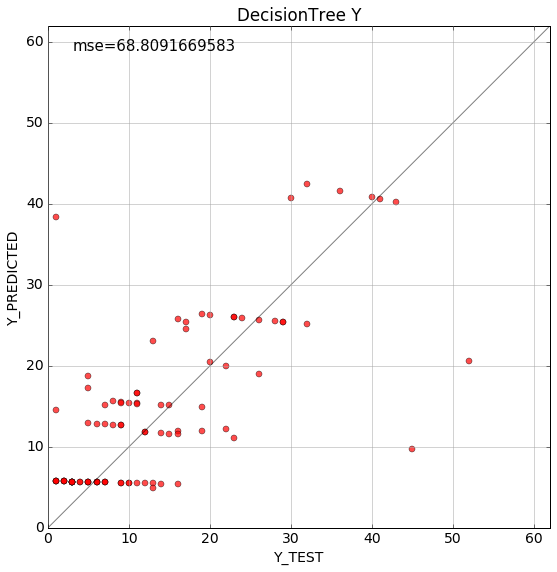

In [161]:
from sklearn.tree import DecisionTreeRegressor

y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    dtree = DecisionTreeRegressor(max_depth=3)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test[0])
    y_predicted.append(y_pred[0])
    y_true.append(y_test[0])
    

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="DecisionTree Y", text=str(mse))

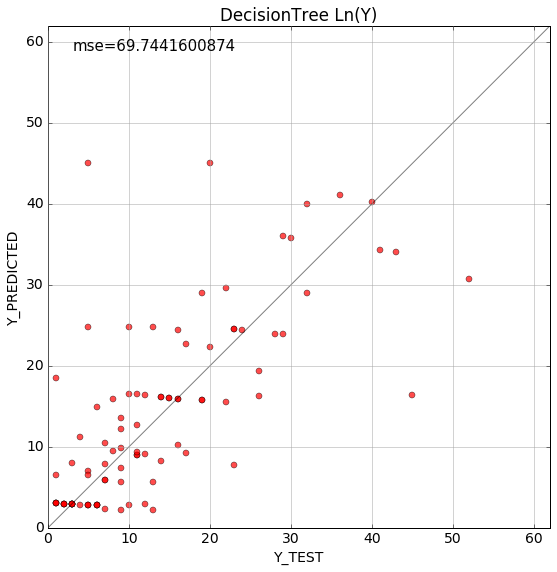

In [162]:
from sklearn.tree import DecisionTreeRegressor

y_predicted = []
y_true = []


for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    dtree = DecisionTreeRegressor(max_depth=4)
    dtree.fit(x_train, np.log(y_train))
    y_pred = dtree.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="DecisionTree Ln(Y)", text=str(mse))

В целом, конечно, дерево решений работает плохо, но выбросы оно вполне себе улавливает

In [128]:
y_true = np.asarray(y_true)
y_predicted = np.asarray(y_predicted)
BIG = 100
y_big_true = y_true[y_true>BIG]
y_big_predicted = y_predicted[y_true>BIG]

In [129]:
a = pd.DataFrame([y_big_true, y_big_predicted])
a.index=["y_true","y_predicted"]
a

""
y_true
y_predicted


Вопрос к Михаилу.

Как замерять RandomForest и другие рандомные методы. Раз через раз дает катастрофическую разницу. 400!

In [130]:
df.reset_index(inplace=True)

In [131]:
predic = pd.Series(np.around(y_predicted))

In [132]:
df["DT_Predict"]=predic
df_LTT = df[["url", "last_time_tweet", "DT_Predict"]]
df_LTT[df_LTT["last_time_tweet"]>70]

,url,last_time_tweet,DT_Predict
125,https://vc.ru/n/rao-stop-money,76,46


### LinearRegression

In [163]:
from sklearn.linear_model import Ridge

Подбираем параметр

In [164]:
alpha = [0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 8e5, 1e6, 2e6, 4e6, 7e6, 1e7, 1e8]

mse = []
for al in alpha:
    y_predicted = []
    y_true = []

    for train_index, test_index in loo:
        x_train, x_test, y_train, y_test = split_data(train_index, test_index)
        model = Ridge(alpha=al)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test[0])
        y_predicted.append(y_pred[0])
        y_true.append(y_test[0])
    
    cur_mse = mean_squared_error(y_true, y_predicted)
    print cur_mse
    mse.append(cur_mse)

best_alpha = alpha[mse.index(min(mse))]
print "Best Aplha = ", best_alpha
#plot(y_true, y_predicted, title="DecisionTree Log(Y)")

396.495987281
396.500352762
396.543682167
396.945444524
398.621305736
366.832300243
190.993465819
104.515776697
99.5397899242
97.6681640567
97.0226803181
96.9167144649
96.7026628861
96.5825258979
96.5519831839
96.5577664947
96.0122743923
Best Aplha =  100000000.0


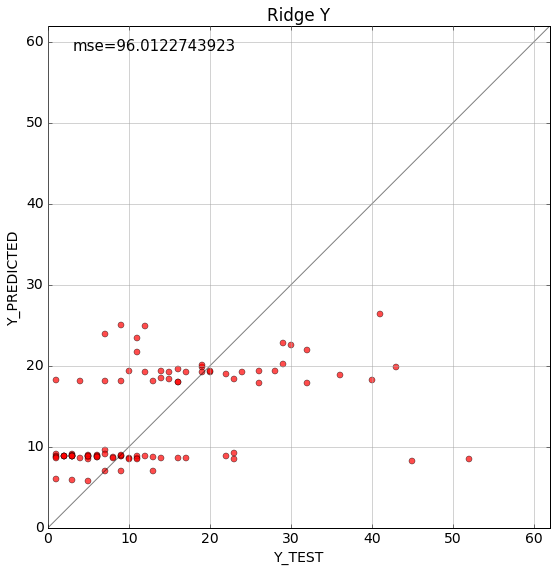

[  2.70719557e-07   3.43342311e-04   1.41817287e-05   4.98617478e-05
   2.62706818e-05   4.76830916e-05  -1.23699268e-04]


In [165]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = Ridge(alpha=best_alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test[0])
    y_predicted.append(y_pred[0])
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Ridge Y", text=str(mse))
print model.coef_

Теперь логарифм

In [166]:
alpha = [0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 8e5, 1e6, 2e6, 4e6, 7e6, 1e7, 1e8]

mse = []
for al in alpha:
    y_predicted = []
    y_true = []

    for train_index, test_index in loo:
        x_train, x_test, y_train, y_test = split_data(train_index, test_index)
        model = Ridge(alpha=al)
        model.fit(x_train, np.log(y_train))
        y_pred = model.predict(x_test[0])
        y_predicted.append(np.exp(y_pred[0]))
        y_true.append(y_test[0])

    cur_mse = mean_squared_error(y_true, y_predicted)
    print cur_mse
    mse.append(cur_mse)


best_alpha = alpha[mse.index(min(mse))]
print "Best Aplha = ", best_alpha
#plot(y_true, y_predicted, title="DecisionTree Log(Y)")

591089881.971
591282597.208
593198006.174
611200112.523
698626004.355
180627658.596
50884.2654962
130.138697885
111.116688681
105.937761339
104.019859869
103.686673672
103.114228803
102.962364684
103.000172153
103.057848364
103.222169794
Best Aplha =  4000000.0


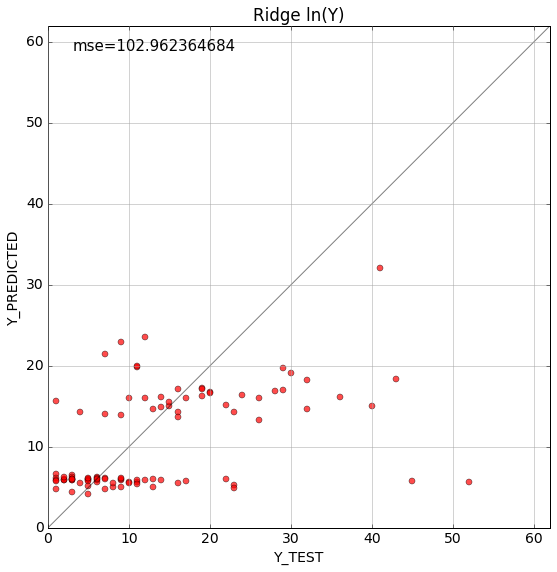

[  1.49963655e-06   1.55462761e-04   2.27239822e-05   4.86446365e-06
  -5.48239028e-05  -7.07554823e-06  -3.77106419e-05]


In [167]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = Ridge(alpha=best_alpha)
    model.fit(x_train, np.log(y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])
    
mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Ridge ln(Y)", text=str(mse))
print model.coef_

# RandomForest 

In [168]:
from sklearn.ensemble import RandomForestRegressor

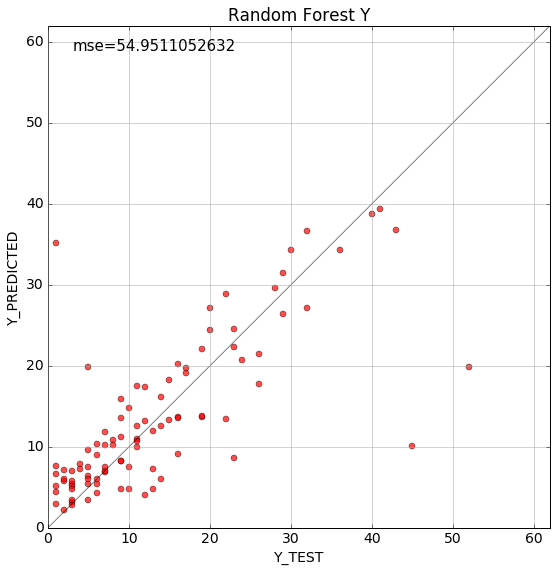

In [169]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = RandomForestRegressor(n_estimators=20)
    model.fit(x_train, (y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append((y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Random Forest Y", text=str(mse))

#### Теперь логарифм

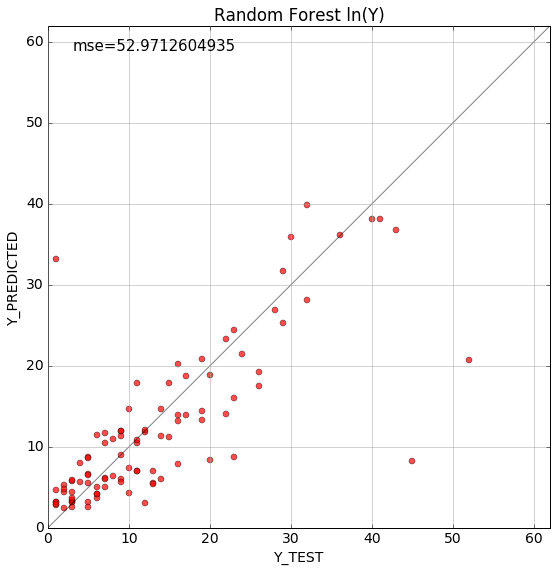

In [170]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = RandomForestRegressor(n_estimators=50)
    model.fit(x_train, np.log(y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Random Forest ln(Y)", text=str(mse))

In [141]:
predic = pd.Series(np.around(y_predicted))
df["predicted"]=predic
d = df.sort_values("last_time_tweet", ascending=False)
d[["url", "last_time_tweet", "predicted"]].head(20)

,url,last_time_tweet,predicted
125,https://vc.ru/n/rao-stop-money,76,50
85,https://vc.ru/n/fb-uk-court,63,60
71,https://vc.ru/n/cards-money,62,59
67,https://vc.ru/p/solar-power,52,53
173,https://tjournal.ru/p/usembru-vs-izvestia,48,43
159,https://tjournal.ru/p/watch-paint-dry,47,47
172,https://tjournal.ru/p/grugq-telegram,43,46
185,https://tjournal.ru/p/aliexpress-garbage,40,37
150,https://tjournal.ru/p/icloud-thief,37,34
165,https://tjournal.ru/p/parking-fire,35,34


## Проверка

In [34]:
df = pd.read_csv(PREPARED_CSV, sep=",")
df = df[["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet", "views", "comments"]]
df = df.drop_duplicates().dropna()
df = df.reset_index()

In [35]:
ltt = df["last_time_tweet"].as_matrix()
comments = df["comments"].as_matrix()
views = df["views"].as_matrix()

In [36]:
np.corrcoef(views, ltt)

array([[ 1.        ,  0.39176351],
       [ 0.39176351,  1.        ]])

In [37]:
np.corrcoef(comments, ltt)

array([[ 1.       ,  0.3524211],
       [ 0.3524211,  1.       ]])

In [38]:
np.corrcoef(views, comments)

array([[ 1.        ,  0.65061814],
       [ 0.65061814,  1.        ]])

In [39]:
m = np.mean(comments)

In [40]:
np.corrcoef(views*np.exp(comments*0.5/m), ltt)

array([[ 1.        ,  0.28837992],
       [ 0.28837992,  1.        ]])

In [333]:
df = pd.read_csv(PREPARED_CSV, sep=",")
df = df[["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet", "views", "comments"]]
df = df.drop_duplicates().dropna()
df = df.reset_index()
ltt = df["last_time_tweet"].as_matrix()
comments = df["comments"].as_matrix()
views = df["views"].as_matrix()

In [367]:
def plot(y_test, y_predicted, labelX, labelY):
    plt.figure(figsize=(9,9))
    plt.plot(y_test, y_predicted, 'ro', label="predicted", alpha=0.7)
    #plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)

    #max_y = max(max(y_true), max(y_predicted))+10

    #plt.xlim(0, max_y)
    #plt.ylim(0, max_y)
    plt.xscale('log')
    plt.yscale('log')
    #plt.legend()
    #plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

    #plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
    #plt.grid(b=True, which='both', color='0.65',linestyle='-')

    plt.show()

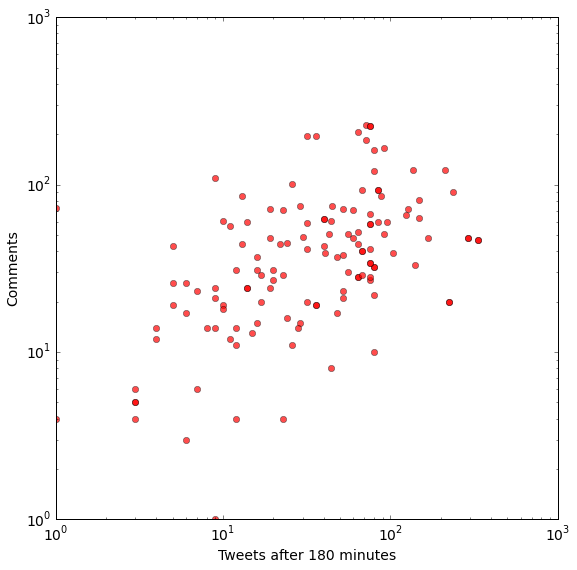

In [368]:
plot(ltt, comments, "Tweets after 180 minutes", "Comments")

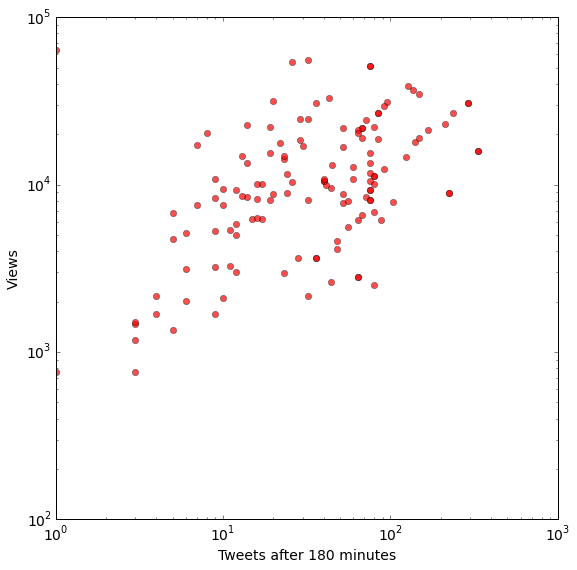

In [362]:
#plot(ltt, views, "Tweets after 180 minutes", "Views")
plt.figure(figsize=(9,9))
plt.plot(ltt, views, 'ro', label="predicted", alpha=0.7)
#plt.title(title)
plt.xlabel("Tweets after 180 minutes")
plt.ylabel("Views")
plt.xscale('log')
plt.yscale('log')
#max_y = max(max(y_true), max(y_predicted))+10
#plt.xlim(0, max_y)
#plt.ylim(0, max_y)
#plt.legend()
#plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

#plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
#plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()

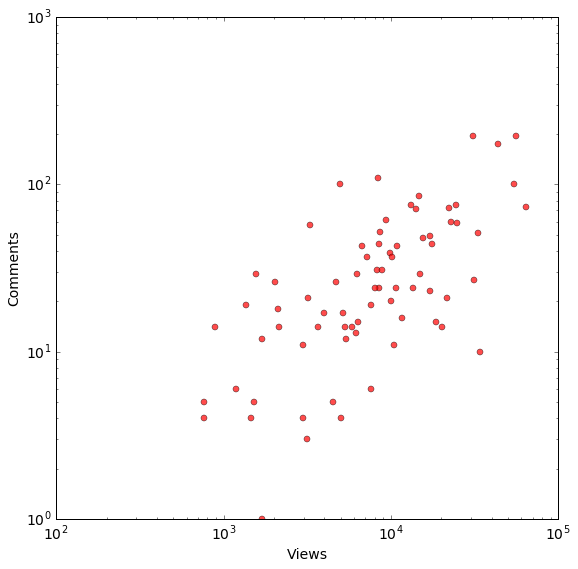

In [41]:
#plot(views, comments, "Views", "Comments")
#plot(ltt, views, "Tweets after 180 minutes", "Views")
plt.figure(figsize=(9,9))
plt.plot(views, comments, 'ro', label="predicted", alpha=0.7)
#plt.title(title)
plt.xlabel("Views")
plt.ylabel("Comments")
plt.xscale('log')
plt.yscale('log')
#max_y = max(max(y_true), max(y_predicted))+10
#plt.xlim(0, max_y)
#plt.ylim(0, max_y)
#plt.legend()
#plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

#plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
#plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()